# Game Development

In [2]:
# libraries
import pandas as pd
import numpy as np
import altair as alt

Group Members: Kristian Abad, Gabriel Fei, Hee Jae Park

#### Author contributions

Author 1 contributed ...

Author 2 contributed ...

#### Abstract

Prepare an abstract *after* you've written the entire report. The abstract should be 4-6 sentences summarizing the report contents. Typically:
* the first 1-2 sentences introduce and motivate the topic;
* the next 1-2 sentences state the aims;
* the next 1-2 sentences state the findings.

---
## Background: Sales of videogames 

Back in 1983, there was an absurd over saturation of video game consoles in the market. Naturally, the enourmous variety of consoles confused customers and led to consumers turning away from the video game market, causing a drop in revenue by a whopping 97 percent. This would be later known as the Video game crash of 1983. Ever since, the video game market has been on a constant rise. The market of videogames have been an increasingly popular form of entertainment pushing computational hardware, content creation, competitive play, and opening many commercial opportunities along the way. Titles or the games themselves have existed through various means such as consoles or specifically curated hardware from companies such as Sony with their Playstation series of console, Microsoft with Xbox consoles, and Nintendo with their most recent Switch console. Recently, another popular option in terms of hardware comes through custom built computers. (image: PS console and Nintendo switch)
<br>


<center>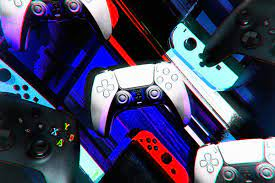</center>

In [3]:
vg_sales = pd.read_csv('vgsales.csv')
vg_sales.loc[:,'Year'] = pd.to_numeric(vg_sales.loc[:,'Year']) #Converting Year to numeric

<blockquote> 
<p>
    <strong>Figure 1</strong>: Shows the total number of video game sold globally from 1980 - 2016.
</p>
</blockquote>

In [5]:
vg_sales_mod = vg_sales.groupby('Year').sum().reset_index()
alt.data_transformers.disable_max_rows()
alt.Chart(vg_sales_mod).mark_bar().encode(
    x=alt.X('Year', scale=alt.Scale(domain=[1980, 2015])),
    y=alt.Y('Global_Sales') #sum sales
)

alt.Chart(...)

The project takes a look at console video game titles since the video game crash to identify how the industry has changed over time. It will mainly explore the business side of the industry, looking at the sales of titles which can be used to discover overall change in tastes over time, the longevity of a franchise or series of games, and possible differences in success of a title by different parts of the world (North America, Europe, Japan, etc). Additionally, it will also attempt to figure out why the console video game industry began to fall around 2010 despite the constant rise for 30 years.

--- 
## 1. Data Description

The data are recorded number of sales in games from year 1980 through 2020 that had sold more than 100,000 copies.

### Basic Information About Collection of Data

The data was found online at https://www.kaggle.com/arslanali4343/sales-of-video-games. The intention for the collection of the data was for general purposes. Regarding the source of data, it is noted that the data values were web scraped off the website https://www.vgchartz.com/ using the python library Beautiful Soup, which is known to pull data from HTML or XML documents. The dataset is composed of popular games introduced to the game market since 1980 and the sampling mechanism was specifically framed around games that totalled up to more than 100,000 copies sold. Additionally, the scope of inference can be extended to games leaning more towards consoles (data is limited in that it does not contain the entirety of the Steam and other platforms) that are currently out for sale in the game market. 

### Data Structure

For this study, the observational units are popular games published between 1980 and 2017, with the variables consisting of the rank, Name, Platform, Year, Genre, Publisher, NA_Sales, EU_Sales, JP_Sales, Other_Sales, and the Global_Sales. Additional details regarding the variables can be found below.

<blockquote> 
<p>
    <strong>Table 1</strong>: The variable description, data type, and the units of measurement for each variable are provided in the table below.
</p>
</blockquote>

Name | Variable description | Type | Units of measurement
---|---|---|---
Rank | Ranking of Overall Sales | Ordinal | Rank Numbers
Name | Name of The Game | Nominal | Game Names
Platform | Platform of Game Release | Nominal | Game Platforms
Year | Year of Game Release | Ordinal | Calendar Year
Genre | Genre of The Game | Nominal | Game Genres
Publisher | Publisher of The Game | Nominal | Game Companies
NA_Sales | Total Sales in North America | Numeric | in Millions
EU_Sales | Total Sales in Europe | Numeric | in Millions
JP_Sales | Total Sales in Japan | Numeric | in Millions
Other_Sales | Total Sales in Rest of the World | Numeric | in Millions
Global_Sales | Total Sales Worldwide | Numeric | in Millions

### Preprocessing of Data

After doing some data exploration, it was seen that a substantial number of observations had missing values in them.    The exact number of missing numbers for each variable had can be found below. 

<blockquote> 
<p>
    <strong>Table 2</strong>: Table shows the number of missing values in the observations by variable in the table below.
</p>
</blockquote>

Name | No of Missing Values 
---|---
Rank | 0 
Name | 0
Platform | 0
Year | 271 
Genre | 0 
Publisher | 58 
NA_Sales | 0
EU_Sales | 0
JP_Sales | 0
Other_Sales | 0
Global_Sales | 2

Upon exploration of the data, it was decided that it would be too dangerous/risky to plainly remove the observations with missing values as they might later be crucial for the subsequent analysis portion. Thus every observation had their missing values replaced with their actual values after searching online. The subsequent analysis was done with the dataset without any missing values.

---
## 2. Methods

---
## 3. Results

In [8]:
data_plot1 = vg_sales.groupby(['Platform', 'Year']).sum().reset_index().drop('Rank', axis = 1)
alt.Chart(data_plot1).mark_line(point = True).encode(
     y = alt.Y('Global_Sales:Q', title = 'Total Global Sales'),
     x = alt.X('Year:Q', title = 'Year'), #Still not sure what type this should be or what will look best w/o sacrificing the x-axis
     color = alt.Color('Platform', title = 'Console')
 ).properties(
     width = 500,
     height = 500
 ).mark_area(opacity = 0.5) #let's smooth this, also maybe do some density work, we could do mean estimates
                                                  # to do more comparisons

alt.Chart(...)

In [9]:
"""
Here I'm just doing some platform isolation.
Might want to include SEGA but it's looking a little
busy right now. Could also do like separate groups
of platforms like Atari, Nintendo, and Sega for one and then
Sony, Microsoft, and Nintendo for the other just to make
a bit more sense of I guess the history or narrative of
the market?

NOTE: Note: Not sure why for some platforms it's showing outliers in years
that the console didn't even exist in. Need to look further into this.

"""

data_plot1['Platform'].unique() # Getting list of consoles
data_plot2 = data_plot1[(data_plot1.Platform=='PS') |
                           (data_plot1.Platform=='PS2') | 
                           (data_plot1.Platform=='PS3') |
                           (data_plot1.Platform=='PS4') |
                           (data_plot1.Platform=='XB')  | 
                           (data_plot1.Platform=='X360') |
                           (data_plot1.Platform=='XOne') |
                           (data_plot1.Platform=='NES') |
                           (data_plot1.Platform=='SNES') | 
                           (data_plot1.Platform=='N64') |
                           (data_plot1.Platform=='GC') |
                           (data_plot1.Platform=='Wii') |
                           (data_plot1.Platform=='WiiU')]
alt.Chart(data_plot2).mark_line(point = True).encode(
     y = alt.Y('Global_Sales:Q', title = 'Total Global Sales'),
     x = alt.X('Year:Q', title = 'Year'),
     color = alt.Color('Platform', title = 'Console'),
     facet = alt.Facet('Platform:N', columns = 3, sort=['PS',
                                                        'PS2',
                                                        'PS3',
                                                        'PS4',
                                                        'XB',
                                                        'X360',
                                                        'XOne',
                                                        'NES',
                                                        'SNES',
                                                        'N64',
                                                        'GC',
                                                        'Wii',
                                                        'WiiU'])
 ).properties(
     width = 250,
     height = 250
 )#.mark_area(opacity=0.8)

#data_plot2
#data_plot1.Platform.unique()
#data_plot1[data_plot1.Platform == 'X360']



alt.Chart(...)

In [10]:
"""
Competitive pairings:
PS2 (console released 2000) vs. Xbone (console released 2001)
PS3 (console released 2006) vs. X360 (console released 2005)

Include Nintendo as a combination?

Hmmm seeing a new console's release and how it may influence
the sales of games of its predecessor's could also be interesting
aside from comparing consoles from different companies...

Here I try to get a base plot of comparing sales of titles
of X360 pre and post XONE

"""
data_plot3 =  vg_sales[(vg_sales.Platform == 'X360')] #new df, don't think we need to group by 2 variables for this one but filtered for X360
compare = alt.Chart(data_plot3).transform_bin(
    'Year', # name to give binned variable
    field = 'Year', # variable to bin
    bin = alt.Bin(step = 1) # binning parameters
).transform_calculate(
    Density = 'datum.Count/(118*1)', # divide counts by sample size x binwidth
    post_xone = 'datum.Year >= 2013'
).transform_density(
    density = 'Year', # variable to smooth
    as_ = ['Year', 'Density'], # names of outputs
    bandwidth = 0.0, # how smooth?
    extent = [2005, 2015], # domain on which the smooth is defined
    steps = 10 # for plotting: number of points to generate for plotting line
).properties(
     width = 250,
     height = 250
).mark_line().encode(
    x = 'Year', 
    y = alt.Y('Density:Q'),
    color = alt.Color('post_xone:N', title = 'Xbox One released?')
)
compare
#data_plot3

# Troubleshooting stuff
#temp = vg_sales[(vg_sales.Rank <= 1000)]
#temp.Platform.unique()

#vg_sales[vg_sales.Rank == 1] #82.74 million
#vg_sales[vg_sales.Rank == 1000] #1.76 million

#vg_sales_mod3[vg_sales_mod3.Year == 2006]
#vg_sales_mod3[vg_sales_mod3.Year == '2006'].count() #this gives different result from the one above

#vg_sales_mod3.loc[:,'Year'] = pd.to_numeric(vg_sales_mod3.loc[:,'Year']) #Converting Year to numeric
#vg_sales_mod3[vg_sales_mod3.Year == 2006].count()


#vg_sales_mod3
#vg_sales_mod3[vg_sales_mod3.Year == 2006]
#temp = vg_sales_mod3[(vg_sales_mod3.Platform == 'Wii') & (vg_sales_mod3.Year <= 2010)]
#vg_sales_mod3
#temp.Year.min()


alt.Chart(...)

### Sales of Video Games by Genre Over Time ( Top 5 )

The games in the game market can be generally divided into their respective genres. It is widely known among gamers to have a specific preference among the distinc genres. Thus, exploring the development of each genre in the game market gives more insight on what type of game gamers have preferred in the past and what genre of games are doing the best in the game market right now.

<blockquote> 
<p>
    <strong>Table 3</strong>: Table shows the top five genres of all time (ranked by global_sales).
</p>
</blockquote>

In [7]:
vg_sales.groupby('Genre').aggregate(sum).sort_values(by='Global_Sales', ascending=False).head(5).iloc[:,2:]

NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
Genre                                                                
Action          875.45    521.68    159.95       187.38       1751.18
Sports          680.92    376.41    135.60       134.97       1330.93
Shooter         581.64    312.12     38.26       102.69       1037.34
Role-Playing    326.41    187.18    352.31        59.61        927.37
Platform        445.59    200.37    130.77        51.59        831.37

<blockquote> 
<p>
    <strong>Figure 1</strong>: Plots show the changes in overall sales for the top 5 genres between 1980 and 2017.
</p>
</blockquote>

In [6]:
data_plot4 = vg_sales[(vg_sales.Genre=='Action') | (vg_sales.Genre=='Sports') | (vg_sales.Genre=='Shooter') 
                      | (vg_sales.Genre=='Role-Playing') | (vg_sales.Genre=='Platform')].groupby(['Genre','Year']).aggregate(sum).reset_index()
alt.Chart(data_plot4).mark_line().properties(
     width=500
).encode(
    x=alt.X('Year:Q'),
    y=alt.Y('Global_Sales'),
    color=alt.Color('Genre')#sum sales
).properties(width=150).mark_area(opacity = 0.5).facet('Genre')

alt.FacetChart(...)

The plots all show growth in sales after entering the 21st century. This is in accordance with how the game market has developed over time. Among these, Action, Shooter and Sports had the biggest growth in the game market with time. These can be seen by the steep incline in the global sales after the year 2000. Meanwhile, the plots also indicate that Platform games had the biggest sales before the 21st century.

---
## 4. Conclusion